In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt

In [ ]:
## CALCULATING MOMENTUM

In [11]:
with open('BTC_price.json', 'r') as json_file:
    dataset = json.load(json_file)

# Extract the relevant information from the dataset
coin_data = dataset['coins']['coingecko:bitcoin']
timestamps = [entry['timestamp'] for entry in coin_data['prices']]
prices = [entry['price'] for entry in coin_data['prices']]

# Create a DataFrame
df = pd.DataFrame({'timestamp': timestamps, 'price': prices})

# Convert the timestamp to a datetime object
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')

# Calculate the 50-day moving average
df['moving_average_50d'] = df['price'].rolling(window=50).mean()

# Calculate the daily percentage change of the moving average
df['momentum_50d'] = df['moving_average_50d'].pct_change() * 100

In [14]:
df

,timestamp,price,moving_average_50d,momentum_50d
0,2023-09-07 06:01:06,25775.370959,NaN,NaN
1,2023-09-08 06:00:18,26235.976221,NaN,NaN
2,2023-09-09 06:00:06,25837.000000,NaN,NaN
3,2023-09-10 06:00:13,25846.000000,NaN,NaN
4,2023-09-11 06:01:19,25882.440063,NaN,NaN
...,...,...,...,...
85,2023-12-01 06:00:23,38149.000000,34377.243961,0.660701
86,2023-12-02 06:00:27,38775.000000,34616.523961,0.696042
87,2023-12-03 06:01:27,39434.938041,34867.522721,0.725084
88,2023-12-04 06:00:28,41465.000000,35159.097568,0.836236


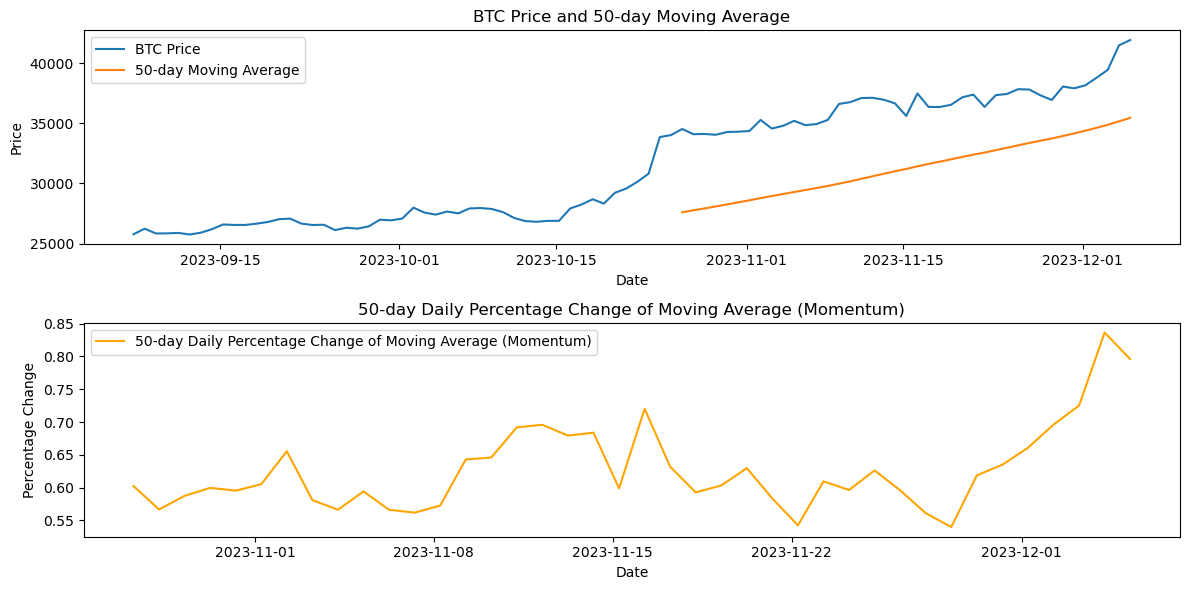

In [13]:
# Plotting
plt.figure(figsize=(12, 6))

# Plot BTC Price
plt.subplot(2, 1, 1)
plt.plot(df['timestamp'], df['price'], label='BTC Price')
plt.plot(df['timestamp'], df['moving_average_50d'], label='50-day Moving Average', linestyle='-')
plt.title('BTC Price and 50-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Plot Daily Percentage Change of Moving Average (Momentum)
plt.subplot(2, 1, 2)
plt.plot(df['timestamp'], df['momentum_50d'], color='orange', label='50-day Daily Percentage Change of Moving Average (Momentum)')
plt.title('50-day Daily Percentage Change of Moving Average (Momentum)')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.legend()

plt.tight_layout()
plt.show()